In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

from dataset import get_manchester

In [64]:
def fit_line(x, y):
    b0, b1 = np.polyfit(x, y, deg=1)
    plt.plot(x, b0*x+b1)

In [31]:
df = pd.read_excel('count every function word.xlsx')

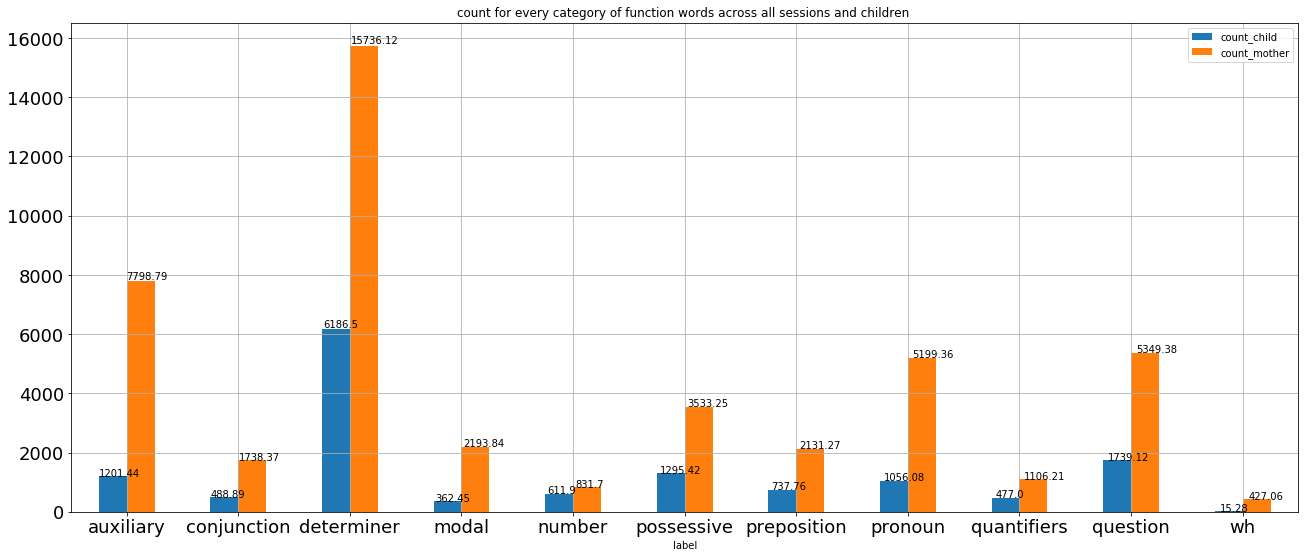

In [41]:
# both child and mother use lots of determiners. 
# 2nd question for child but auxiliary for mother
# 3rd possessive for child but question for mother
# 4th auxiliary for child but 
ax = df.groupby('label').mean().plot.bar(rot=0, title='count for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 2), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [46]:
df_mean = df.groupby('label').mean()

In [47]:
df_mean

,count_child,count_mother
label,,
auxiliary,1201.441176,7798.794118
conjunction,488.885714,1738.371429
determiner,6186.500000,15736.125000
modal,362.451613,2193.838710
number,611.900000,831.700000
possessive,1295.416667,3533.250000
preposition,737.757009,2131.271028
pronoun,1056.080000,5199.360000
quantifiers,477.000000,1106.210526


In [52]:
df_mean.index

Index(['auxiliary', 'conjunction', 'determiner', 'modal', 'number',
       'possessive', 'preposition', 'pronoun', 'quantifiers', 'question',
       'wh'],
      dtype='object', name='label')

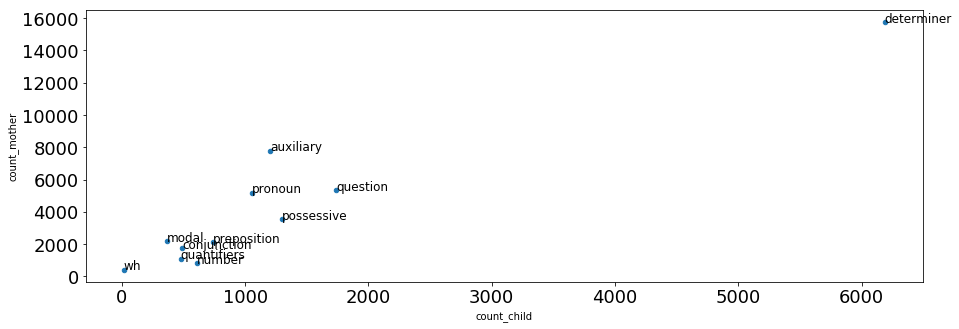

In [72]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)

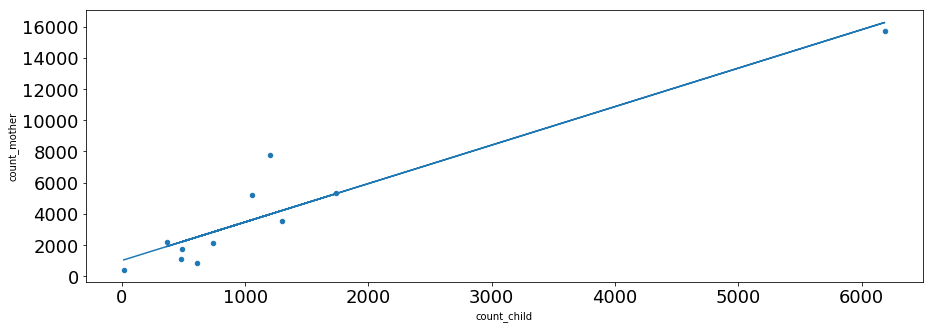

significant
p:  1.7032207318119695e-05 residuals:  0.2984541325035911


In [70]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)